<p><h1><u><b>Linear Regression</b></u></h1></p>
**Team Bashi**

# I. Data Preparation

Importing libraries and packages

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn import preprocessing

In [121]:
# Update for particular route
df= pd.read_csv("final_route_145.csv", sep=',')
df.head()

,progrnumber,stop_id,routeid,direction,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,target
0,37,2062,145_105,2,1,10,6,0.2,9.9,16.0,1661.0
1,37,2062,145_105,2,1,9,6,0.2,9.9,16.0,NaN
2,40,2065,145_105,2,1,10,6,0.2,9.9,16.0,1711.0
3,40,2065,145_105,2,1,9,6,0.2,9.9,16.0,1885.0
4,40,2065,145_105,2,1,9,6,0.2,9.9,16.0,NaN


## Cleaning the datasets 

In [122]:
df.columns

Index(['progrnumber', 'stop_id', 'routeid', 'direction', 'timeofarrival_month',
       'timeofarrival_hour', 'timeofarrival_weekday', 'rain', 'temp', 'wdsp',
       'target'],
      dtype='object')

In [123]:
df.notnull().mean()

progrnumber              1.000000
stop_id                  1.000000
routeid                  1.000000
direction                1.000000
timeofarrival_month      1.000000
timeofarrival_hour       1.000000
timeofarrival_weekday    1.000000
rain                     1.000000
temp                     1.000000
wdsp                     1.000000
target                   0.964105
dtype: float64

In [124]:
df.dropna()

,progrnumber,stop_id,routeid,direction,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,target
0,37,2062,145_105,2,1,10,6,0.2,9.9,16.0,1661.0
2,40,2065,145_105,2,1,10,6,0.2,9.9,16.0,1711.0
3,40,2065,145_105,2,1,9,6,0.2,9.9,16.0,1885.0
5,45,2069,145_105,2,1,10,6,0.2,9.9,16.0,2004.0
6,45,2069,145_105,2,1,9,6,0.2,9.9,16.0,2200.0
8,50,770,145_105,2,1,10,6,0.2,9.9,16.0,2313.0
9,50,770,145_105,2,1,9,6,0.2,9.9,16.0,2455.0
11,55,775,145_105,2,1,10,6,0.2,9.9,16.0,2499.0
12,55,775,145_105,2,1,9,6,0.2,9.9,16.0,2654.0
14,67,325,145_105,2,1,9,6,0.2,9.9,16.0,3632.0


In [125]:
df.dtypes

progrnumber                int64
stop_id                    int64
routeid                   object
direction                  int64
timeofarrival_month        int64
timeofarrival_hour         int64
timeofarrival_weekday      int64
rain                     float64
temp                     float64
wdsp                     float64
target                   float64
dtype: object

In [ ]:
df.shape

In [126]:
df['progrnumber']= df['progrnumber'].astype('category')
df['routeid']= df['routeid'].astype('category')
df['stop_id'] = df['stop_id'].astype('category')
df['timeofarrival_month']= df['timeofarrival_month'].astype('category')
df['timeofarrival_hour']= df['timeofarrival_hour'].astype('category')
df['timeofarrival_weekday']= df['timeofarrival_weekday'].astype('category')
df['direction']= df['direction'].astype('category')
df['target']=df['target'].astype('float')
df.dtypes

progrnumber              category
stop_id                  category
routeid                  category
direction                category
timeofarrival_month      category
timeofarrival_hour       category
timeofarrival_weekday    category
rain                      float64
temp                      float64
wdsp                      float64
target                    float64
dtype: object

In [127]:
df.shape

(596043, 11)

Sort dataframe by Region name and Year

In [128]:
df = df.sort_values(by=['routeid','timeofarrival_month','timeofarrival_weekday','timeofarrival_hour'])
df.head(16)


,progrnumber,stop_id,routeid,direction,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,target
399291,34,2016,145_102,1,1,0,0,0.0,9.1,14.0,1684.0
399293,39,7362,145_102,1,1,0,0,0.0,9.1,14.0,1813.0
399295,44,3133,145_102,1,1,0,0,0.0,9.1,14.0,2008.0
399297,47,3136,145_102,1,1,0,0,0.0,9.1,14.0,2177.0
399299,46,3135,145_102,1,1,0,0,0.0,9.1,14.0,2109.0
399301,45,3134,145_102,1,1,0,0,0.0,9.1,14.0,2075.0
399303,43,3132,145_102,1,1,0,0,0.0,9.1,14.0,1987.0
399305,42,3131,145_102,1,1,0,0,0.0,9.1,14.0,1967.0
399307,41,3130,145_102,1,1,0,0,0.0,9.1,14.0,1926.0
399309,40,3129,145_102,1,1,0,0,0.0,9.1,14.0,1903.0


## Cleaning Main Dataframe

Check for duplicate rows and columns

In [129]:
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate rows: 7277
Duplicate columns: 0


Drop constant columns if any

In [130]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

In [131]:
df.describe().T
df.shape[1]

11

Check for any missing values

In [132]:
df.isnull().sum()

progrnumber                  0
stop_id                      0
routeid                      0
direction                    0
timeofarrival_month          0
timeofarrival_hour           0
timeofarrival_weekday        0
rain                         0
temp                         0
wdsp                         0
target                   19622
dtype: int64

In [133]:
df['target'].fillna(0, inplace=True)

Check for irregular cardinality in categorical features

In [134]:
print("Unique values for:\n- routeid:", pd.unique(df.routeid.ravel()))

Unique values for:
- routeid: ['145_102' '145_105']


There are no irregular cardinalities for the two categorical features.

### Define Categorical Features

In [135]:
categoricalColumns = ['progrnumber','routeid','stop_id','timeofarrival_month','timeofarrival_weekday','direction'] 

### Define Continuous Features

In [136]:
continuousColumns = df[['rain', 'temp', 'wdsp','target']].columns 

df[continuousColumns].describe().T

,count,mean,std,min,25%,50%,75%,max
rain,588766.0,0.094815,0.460849,0.0,0.0,0.0,0.0,7.8
temp,588766.0,13.176294,4.747745,-1.4,10.6,13.8,16.3,26.6
wdsp,588766.0,9.375513,4.480183,0.0,6.0,9.0,12.0,27.0
target,588766.0,2425.695638,1458.386622,-2159.0,1298.0,2374.0,3460.0,17821.0


## Graphical Representation

### Continuous Features

##### Plot a histagram of all the continuous features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ebce2b0>,
      dtype=object)

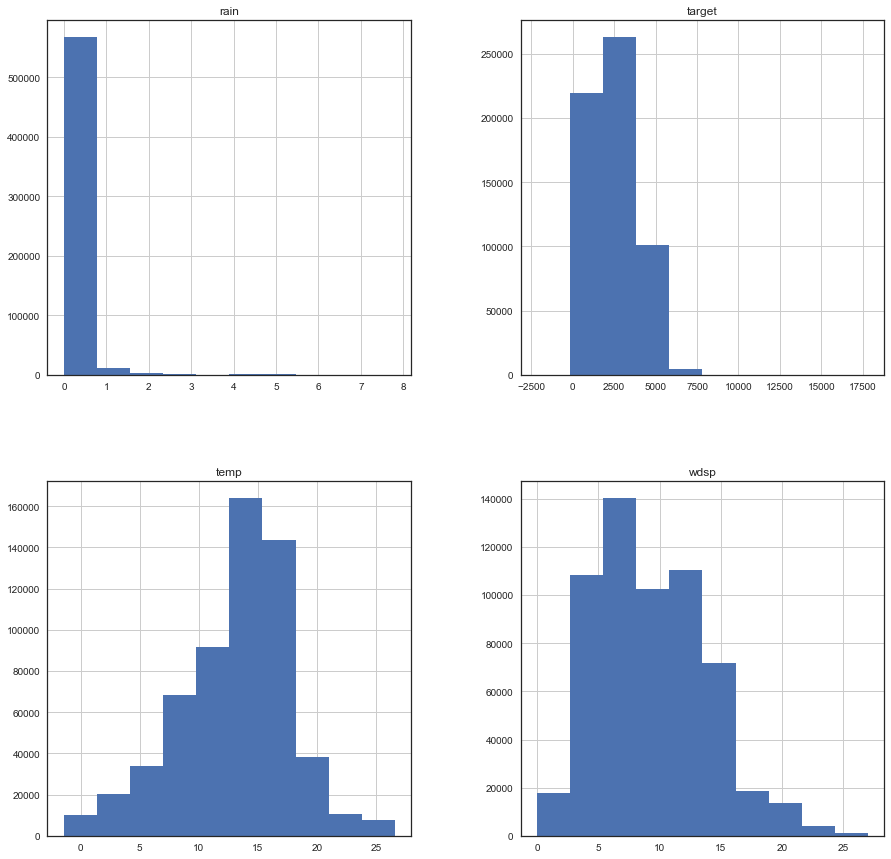

In [137]:
df[continuousColumns].hist(figsize=(15,15))

##### Plot box plots for all the continuous features

In [138]:
# for col in continuousColumns:
#     print (col)
#     f = df[col].plot(kind='box', figsize=(10,10))
#     plt.show()

### Categorical Features

###### Bar charts 
Bar charts of all the features for each Irish county for the year 2008
By changing the year we can see the bar charts for the years 2009-2015

In [139]:
df['routeid'] = df['routeid'].astype('category')
df['stop_id'] = df['stop_id'].astype('category')
df['timeofarrival_month'] = df['timeofarrival_month'].astype('category')
df['timeofarrival_weekday'] = df['timeofarrival_weekday'].astype('category')
df['direction'] = df['direction'].astype('category')
df['progrnumber'] = df['progrnumber'].astype('category')
# df.dtypes
df.columns

Index(['progrnumber', 'stop_id', 'routeid', 'direction', 'timeofarrival_month',
       'timeofarrival_hour', 'timeofarrival_weekday', 'rain', 'temp', 'wdsp',
       'target'],
      dtype='object')

### Add target feature DelayClass 
Create categorical feature DelayClass from target feature target for Data Analysis Models.

Reset the indexes and drop old indexes

In [140]:
df = df.reset_index()
df = df.drop(['index'], axis=1)

In [141]:
df.head(10)

,progrnumber,stop_id,routeid,direction,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,target
0,34,2016,145_102,1,1,0,0,0.0,9.1,14.0,1684.0
1,39,7362,145_102,1,1,0,0,0.0,9.1,14.0,1813.0
2,44,3133,145_102,1,1,0,0,0.0,9.1,14.0,2008.0
3,47,3136,145_102,1,1,0,0,0.0,9.1,14.0,2177.0
4,46,3135,145_102,1,1,0,0,0.0,9.1,14.0,2109.0
5,45,3134,145_102,1,1,0,0,0.0,9.1,14.0,2075.0
6,43,3132,145_102,1,1,0,0,0.0,9.1,14.0,1987.0
7,42,3131,145_102,1,1,0,0,0.0,9.1,14.0,1967.0
8,41,3130,145_102,1,1,0,0,0.0,9.1,14.0,1926.0
9,40,3129,145_102,1,1,0,0,0.0,9.1,14.0,1903.0


Overall average rent in dataset

In [142]:
# df['target'] = df['target'].astype('int64')
df.target.mean()

2425.6956379954004

Mapping prices higher than average rent of 0.474.58 to category High with the remaining rent to category Low

In [143]:
DelayClass = (df.target > 50.582464) * 1.0

df_DelayClass = pd.DataFrame({'DelayClass': DelayClass})
df_DelayClass.head()

,DelayClass
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


Add column RentClass to dataframe

In [144]:
df = pd.concat([df, df_DelayClass], axis = 1)
df.head(20)

,progrnumber,stop_id,routeid,direction,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,target,DelayClass
0,34,2016,145_102,1,1,0,0,0.0,9.1,14.0,1684.0,1.0
1,39,7362,145_102,1,1,0,0,0.0,9.1,14.0,1813.0,1.0
2,44,3133,145_102,1,1,0,0,0.0,9.1,14.0,2008.0,1.0
3,47,3136,145_102,1,1,0,0,0.0,9.1,14.0,2177.0,1.0
4,46,3135,145_102,1,1,0,0,0.0,9.1,14.0,2109.0,1.0
5,45,3134,145_102,1,1,0,0,0.0,9.1,14.0,2075.0,1.0
6,43,3132,145_102,1,1,0,0,0.0,9.1,14.0,1987.0,1.0
7,42,3131,145_102,1,1,0,0,0.0,9.1,14.0,1967.0,1.0
8,41,3130,145_102,1,1,0,0,0.0,9.1,14.0,1926.0,1.0
9,40,3129,145_102,1,1,0,0,0.0,9.1,14.0,1903.0,1.0


# II. Data Modeling

### Prepare training and test sets
Randomly shuffle the rows of the dataset and split the dataset into two datasets: 70% training set and 30% test set

In [145]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
train.head(10)

,progrnumber,stop_id,routeid,direction,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,target,DelayClass
194163,65,2963,145_102,1,6,13,3,0.0,16.3,13.0,4720.0,1.0
471903,2,4177,145_105,2,6,6,3,0.0,11.6,8.0,104.0,1.0
4046,48,3138,145_102,1,1,11,0,0.0,6.3,15.0,2874.0,1.0
437465,25,3143,145_105,2,6,10,2,0.0,16.1,7.0,1676.0,1.0
400211,65,7587,145_105,2,6,9,1,0.0,15.3,6.0,4024.0,1.0
533940,19,4204,145_105,2,6,14,4,0.0,13.4,9.0,1363.0,1.0
447338,9,4182,145_105,2,6,13,2,0.0,18.4,7.0,471.0,1.0
81051,56,4130,145_102,1,6,10,0,0.2,13.7,2.0,4369.0,1.0
386233,11,2997,145_105,2,6,16,0,0.0,16.7,16.0,593.0,1.0
503961,20,4205,145_105,2,6,18,3,0.0,13.6,16.0,1340.0,1.0


In [146]:
test.head(10)

,progrnumber,stop_id,routeid,direction,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,target,DelayClass
514671,27,3145,145_105,2,6,7,4,0.0,16.2,5.0,1424.0,1.0
255678,24,2007,145_102,1,6,22,4,0.4,12.3,7.0,1676.0,1.0
425426,70,1445,145_105,2,6,21,1,0.0,14.9,11.0,3755.0,1.0
544262,9,4182,145_105,2,6,18,4,0.0,13.7,8.0,553.0,1.0
204158,54,4128,145_102,1,6,17,3,0.0,14.0,14.0,4759.0,1.0
80659,11,845,145_102,1,6,10,0,0.0,16.4,17.0,1943.0,1.0
507939,42,4728,145_105,2,6,20,3,0.0,10.0,3.0,2194.0,1.0
366274,48,768,145_105,2,1,15,6,0.1,11.7,22.0,2973.0,1.0
10842,8,406,145_102,1,1,19,0,0.0,8.8,5.0,1175.0,1.0
560023,32,5128,145_105,2,6,12,5,0.0,17.8,16.0,1937.0,1.0


Grouping values for the categorical features 

In [147]:
#  df[['Region', 'Year']].groupby('Year').nunique()

## Looking for Correlations

### Continuous Features

In [148]:
subset = train[continuousColumns]
train[continuousColumns].corr()

,rain,temp,wdsp,target
rain,1.000000,0.016765,-0.044476,0.001749
temp,0.016765,1.000000,-0.105381,0.065046
wdsp,-0.044476,-0.105381,1.000000,0.015166
target,0.001749,0.065046,0.015166,1.000000


##### Correlation Matrix
**Correlation between continuous features**

Calculate correlation of all pairs of continuous features and generate correlation matrix.

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

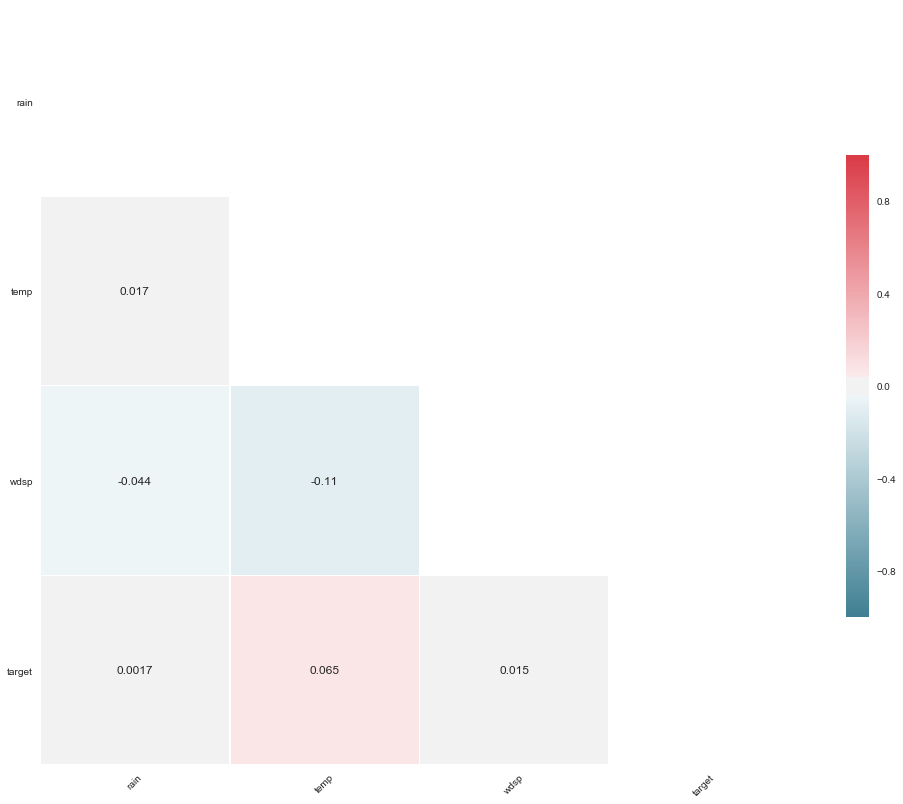

In [149]:
corr = subset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(17, 17))

# Create a custom blue and red colormap 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw map with mask and aspect ratio
sns.set(style="white")
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

##### Scatter Plots
**Correlation between each continuous feature and target feature**

For each continuous feature its interaction is plotted with the target feature.

In [150]:
#Commented out for time
# for feature in continuousColumns:
#     train.plot(figsize=(17,3), x=feature, y='target', kind='scatter', label="%.3f" % train[[feature, 'target']].corr().as_matrix()[0,1])

### Categorical Features

In [151]:
train.shape

(412136, 12)

In [152]:
categoricalColumns

['progrnumber',
 'routeid',
 'stop_id',
 'timeofarrival_month',
 'timeofarrival_weekday',
 'direction']

In [153]:
train.dtypes

progrnumber              category
stop_id                  category
routeid                  category
direction                category
timeofarrival_month      category
timeofarrival_hour       category
timeofarrival_weekday    category
rain                      float64
temp                      float64
wdsp                      float64
target                    float64
DelayClass                float64
dtype: object

In [154]:
# train['routeid']= train['routeid'].astype('category')
# train['stop_id'] = train['stop_id'].astype('category')
# train['timeofarrival_month']= train['timeofarrival_month'].astype('category')
# train['timeofarrival_weekday']= train['timeofarrival_weekday'].astype('category')
# train['timeofarrival_hour']= train['timeofarrival_hour'].astype('category')
# train['direction']= train['direction'].astype('category')
# train['DelayClass']=train['DelayClass'].astype('category')
# train['progrnumber']=train['progrnumber'].astype('category')
# train.dtypes

# train['routeid']= train['routeid'].astype('category')
# train['stop_id'] = train['stop_id'].astype('int64')
# train['timeofarrival_year']= train['timeofarrival_year'].astype('int64')
# train['timeofarrival_month']= train['timeofarrival_month'].astype('int64')
# train['timeofarrival_weekday']= train['timeofarrival_weekday'].astype('int64')
# train['timeofarrival_hour']= train['timeofarrival_hour'].astype('int64')
# train['direction']= train['direction'].astype('int64')
# train['DelayClass']=train['DelayClass'].astype('float64')
# train.dtypes

In [155]:
# train[['stop_id', 'routeid','direction','timeofarrival_month','timeofarrival_weekday','timeofarrival_hour','DelayClass']].groupby('routeid').nunique()

# III. Predictive Modeling: Linear Regression

### Train Model
Train a linear regression model with the training set to predict the target feature

This formula specifies the target feature and the descriptive features used for training the linear regression model. For training the model we call the method fit() on the given data stored in our training set dataframe.

In [156]:
# from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import cross_val_score
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.dummy import DummyClassifier
# from sklearn import metrics
import statsmodels.formula.api as sm

from sklearn.externals import joblib

## Finalize model with joblib

In [157]:
lm = sm.ols(formula= 'target ~  rain + temp + wdsp + direction  + timeofarrival_month + timeofarrival_weekday + timeofarrival_hour + progrnumber', data=train).fit()

filename = 'finalized_model.sav'
joblib.dump(lm, filename, compress=3)
# lm.save('145.pickle')

display (lm.params)

Intercept                     -443.390060
direction[T.2]                -801.733685
timeofarrival_month[T.6]        32.708349
timeofarrival_weekday[T.1]      32.337024
timeofarrival_weekday[T.2]      52.259196
timeofarrival_weekday[T.3]      79.807603
timeofarrival_weekday[T.4]     127.448574
timeofarrival_weekday[T.5]     -80.922794
timeofarrival_weekday[T.6]    -234.274048
timeofarrival_hour[T.6]        307.946582
timeofarrival_hour[T.7]        294.160565
timeofarrival_hour[T.8]        730.616726
timeofarrival_hour[T.9]        971.208346
timeofarrival_hour[T.10]       716.425268
timeofarrival_hour[T.11]       650.969688
timeofarrival_hour[T.12]       716.974145
timeofarrival_hour[T.13]       794.749590
timeofarrival_hour[T.14]       794.067976
timeofarrival_hour[T.15]       827.700442
timeofarrival_hour[T.16]       919.073825
timeofarrival_hour[T.17]       995.634617
timeofarrival_hour[T.18]       957.647856
timeofarrival_hour[T.19]       684.459989
timeofarrival_hour[T.20]       393

Model's parameters

In [158]:
display(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 1.525e+04
Date:                Mon, 09 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:00:40   Log-Likelihood:            -3.2679e+06
No. Observations:              412136   AIC:                         6.536e+06
Df Residuals:                  412035   BIC:                         6.537e+06
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -443.3901     22.548    -19.664      0.000    -487.584    -399.196
direction[T.2]              -801.7337      2.124   -377.523      0.000    -805.896    -797.571
timeofarrival_month[T.6]      32.7083      4.348      7.523      0.000      24.187      41.230
timeofarrival_weekday[T.1]    32.3370      3.935      8.217      0.000      24.624      40.050
timeofarrival_weekday[T.2]    52.2592      3.802     13.746      0.000      44.808      59.711
timeofarrival_weekday[T.3]    79.8076      3.925     20.334      0.000      72.115      87.500
timeofarrival_weekday[T.4]   127.4486      3.882     32.834      0.000     119.841     135.056
timeofarrival_weekday[T.5]   -80.9228      4.623    -17.504      0.000     -89.984     -71.862
timeofarrival_weekday[T.6]  -234.2740      4.952    -47.308      0.000    -243.980    -224.568
timeofarrival_hour[T.6]      307.9466     19.748     15.594      0.000     269.241     346.653
timeofarrival_hour[T.7]      294.1606     18.140     16.216      0.000     258.606     329.715
timeofarrival_hour[T.8]      730.6167     18.083     40.404      0.000     695.175     766.058
timeofarrival_hour[T.9]      971.2083     17.953     54.097      0.000     936.021    1006.396
timeofarrival_hour[T.10]     716.4253     17.973     39.862      0.000     681.199     751.651
timeofarrival_hour[T.11]     650.9697     18.007     36.152      0.000     615.677     686.262
timeofarrival_hour[T.12]     716.9741     18.033     39.759      0.000     681.630     752.318
timeofarrival_hour[T.13]     794.7496     18.058     44.011      0.000     759.356     830.143
timeofarrival_hour[T.14]     794.0680     18.049     43.994      0.000     758.692     829.444
timeofarrival_hour[T.15]     827.7004     18.056     45.841      0.000     792.312     863.089
timeofarrival_hour[T.16]     919.0738     18.037     50.954      0.000     883.721     954.427
timeofarrival_hour[T.17]     995.6346     17.962     55.431      0.000     960.430    1030.839
timeofarrival_hour[T.18]     957.6479     17.976     53.275      0.000     922.416     992.880
timeofarrival_hour[T.19]     684.4600     17.941     38.151      0.000     649.297     719.623
timeofarrival_hour[T.20]     393.0027     17.968     21.872      0.000     357.786     428.219
timeofarrival_hour[T.21]     236.8503     18.028     13.138      0.000     201.516     272.184
timeofarrival_hour[T.22]     247.9538     18.286     13.560      0.000     212.113     283.794
timeofarrival_hour[T.23]      36.5178     18.739      1.949      0.051      -0.209      73.245
progrnumber[T.2]              82.3954     16.237      5.075      0.000      50.572     114.219
progrnumber[T.3]             162.5831     16.219     10.024      0.000     130.795     194.371
progrnumber[T.4]             249.5862     1

### Predict Target Feature

Threshold the predicted target feature value given by the linear regression model at 0.5, to get the predicted class for each example. 

In [159]:
predictionsThreshold = lm.predict(train)
predictions = predictionsThreshold.head(30)
train_sample = train.head(30)    
threshold2 = list()

for value in predictions:
    if value < 0.5:
        threshold2.append(0)
    elif value > 0.5:
        threshold2.append(1)
        
true_vs_log_predicted = pd.DataFrame({'Actual Delay': train_sample.target, 'Predicted Delay': predictions, 'ThresholdPredictedClass': threshold2})
true_vs_log_predicted

,Actual Delay,Predicted Delay,ThresholdPredictedClass
194163,4720.0,4780.559334,1
471903,104.0,-617.907449,0
4046,2874.0,3329.841663,1
437465,1676.0,1488.089594,1
400211,4024.0,4090.909224,1
533940,1363.0,1305.688067,1
447338,471.0,674.900561,1
81051,4369.0,3901.010590,1
386233,593.0,879.959720,1
503961,1340.0,1475.829151,1


#### Evaluate Model 
Classification evaluation measures computed on the training set 

Mean Squared Error of the model 

In [160]:
mse = ((train.target - lm.predict(train))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 451460.9820771769


In [161]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(train_sample.target, predictions)

373.602835887475

In [162]:
from sklearn.metrics import r2_score
r2_score(train_sample.target, predictions)

0.8976751523054923

### Evaluate the model using test set
classification evaluation measures on the hold-out (30% examples) test set.

#### Train model on test dataset

In [163]:
lmt = sm.ols(formula= 'target ~  rain + temp + wdsp + direction + timeofarrival_month + timeofarrival_weekday + timeofarrival_hour + progrnumber ', data=test).fit()

In [164]:
display (lmt.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     6505.
Date:                Mon, 09 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:00:46   Log-Likelihood:            -1.4014e+06
No. Observations:              176630   AIC:                         2.803e+06
Df Residuals:                  176529   BIC:                         2.804e+06
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -458.3680     34.729    -13.199      0.000    -526.435    -390.301
direction[T.2]              -803.1914      3.262   -246.199      0.000    -809.586    -796.797
timeofarrival_month[T.6]      48.6161      6.700      7.256      0.000      35.484      61.748
timeofarrival_weekday[T.1]    36.8222      6.041      6.095      0.000      24.982      48.662
timeofarrival_weekday[T.2]    49.7116      5.837      8.517      0.000      38.272      61.152
timeofarrival_weekday[T.3]    87.9381      6.022     14.603      0.000      76.135      99.741
timeofarrival_weekday[T.4]   121.4345      5.969     20.344      0.000     109.735     133.134
timeofarrival_weekday[T.5]   -91.3510      7.128    -12.816      0.000    -105.322     -77.380
timeofarrival_weekday[T.6]  -243.6450      7.558    -32.238      0.000    -258.458    -228.832
timeofarrival_hour[T.6]      303.2229     30.281     10.013      0.000     243.872     362.574
timeofarrival_hour[T.7]      301.9714     27.816     10.856      0.000     247.453     356.489
timeofarrival_hour[T.8]      750.9651     27.713     27.098      0.000     696.648     805.282
timeofarrival_hour[T.9]      987.9327     27.513     35.908      0.000     934.008    1041.857
timeofarrival_hour[T.10]     717.2157     27.540     26.043      0.000     663.238     771.193
timeofarrival_hour[T.11]     667.8769     27.592     24.206      0.000     613.798     721.956
timeofarrival_hour[T.12]     711.4128     27.633     25.745      0.000     657.254     765.572
timeofarrival_hour[T.13]     797.6566     27.660     28.838      0.000     743.444     851.869
timeofarrival_hour[T.14]     799.9394     27.657     28.923      0.000     745.732     854.147
timeofarrival_hour[T.15]     842.5076     27.673     30.446      0.000     788.270     896.745
timeofarrival_hour[T.16]     922.2175     27.643     33.362      0.000     868.038     976.397
timeofarrival_hour[T.17]     989.8728     27.531     35.955      0.000     935.913    1043.832
timeofarrival_hour[T.18]     962.3903     27.551     34.931      0.000     908.390    1016.390
timeofarrival_hour[T.19]     698.8852     27.493     25.420      0.000     644.999     752.772
timeofarrival_hour[T.20]     398.7725     27.550     14.474      0.000     344.774     452.771
timeofarrival_hour[T.21]     234.6870     27.640      8.491      0.000     180.513     288.861
timeofarrival_hour[T.22]     262.2690     28.030      9.357      0.000     207.330     317.208
timeofarrival_hour[T.23]      25.4834     28.791      0.885      0.376     -30.945      81.912
progrnumber[T.2]              73.6681     25.070      2.939      0.003      24.532     122.804
progrnumber[T.3]             163.0684     25.145      6.485      0.000     113.785     212.351
progrnumber[T.4]             248.0520     2

In [165]:
test = test.dropna(axis=0, how='any')

Pair the actual and predictive values for the test set

In [166]:
predictionsTestClass = pd.DataFrame({'Actual Delay': test.target, 'Prediction Delay': lm.predict(test)})
predictionsTestClass.head(10)

,Actual Delay,Prediction Delay
514671,1424.0,1243.592521
255678,1676.0,1800.226165
425426,3755.0,3944.105547
544262,553.0,866.758101
204158,4759.0,4137.126703
80659,1943.0,1477.011424
507939,2194.0,2099.176172
366274,2973.0,2531.982722
10842,1175.0,1085.044031
560023,1937.0,1770.904995


#### Evaluate Model 
Classification evaluation measures computed on the test set 

Print the Mean Squared Error of the model on the training set

In [167]:
mse = ((test.target - lm.predict(test))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 456638.23678081966


In [168]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test.target, lm.predict(test))

402.38703111711084

In [169]:
from sklearn.metrics import r2_score
r2_score(test.target, lm.predict(test))

0.7863883906644078

In [170]:
train.shape

(412136, 12)

In [171]:
test.shape

(176630, 12)

# IV. Predictive Modeling: Neural Model

### Train Model
Import packages to use for Neural Modeling

In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [173]:
df= pd.read_csv("final_route_145.csv", sep=',')
df.head()

,progrnumber,stop_id,routeid,direction,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp,target
0,37,2062,145_105,2,1,10,6,0.2,9.9,16.0,1661.0
1,37,2062,145_105,2,1,9,6,0.2,9.9,16.0,NaN
2,40,2065,145_105,2,1,10,6,0.2,9.9,16.0,1711.0
3,40,2065,145_105,2,1,9,6,0.2,9.9,16.0,1885.0
4,40,2065,145_105,2,1,9,6,0.2,9.9,16.0,NaN


In [174]:
df =df.loc[df['direction']== 1]

In [175]:
df.loc[df['progrnumber']== 1,"distance"] = 0

In [176]:
df.isnull().sum()

progrnumber                   0
stop_id                       0
routeid                       0
direction                     0
timeofarrival_month           0
timeofarrival_hour            0
timeofarrival_weekday         0
rain                          0
temp                          0
wdsp                          0
target                     6110
distance                 291561
dtype: int64

In [177]:
df = df.dropna()

In [178]:
df = pd.get_dummies(data=df, columns=['stop_id','timeofarrival_hour','timeofarrival_weekday'])

In [179]:
df.shape

(4288, 35)

In [180]:
df.sample(10)

,progrnumber,routeid,direction,timeofarrival_month,rain,temp,wdsp,target,distance,stop_id_4320,...,timeofarrival_hour_21,timeofarrival_hour_22,timeofarrival_hour_23,timeofarrival_weekday_0,timeofarrival_weekday_1,timeofarrival_weekday_2,timeofarrival_weekday_3,timeofarrival_weekday_4,timeofarrival_weekday_5,timeofarrival_weekday_6
335829,1,145_102,1,6,0.0,13.7,20.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
594422,1,145_102,1,6,0.0,18.4,4.0,0.0,0.0,1,...,1,0,0,0,0,0,0,0,1,0
340979,1,145_102,1,6,0.0,24.5,7.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
185924,1,145_102,1,6,0.0,14.3,16.0,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
171066,1,145_102,1,6,0.0,15.7,16.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
134037,1,145_102,1,6,0.0,11.8,11.0,0.0,0.0,1,...,0,0,0,0,0,0,1,0,0,0
1499,1,145_102,1,1,0.0,4.1,20.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
255479,1,145_102,1,6,0.0,13.5,6.0,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
272927,1,145_102,1,6,0.0,18.7,7.0,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
353537,1,145_102,1,6,0.0,23.0,6.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0


In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# from sklearn import preprocessing
# normalized_df = preprocessing.normalize(df)
# df= pd.DataFrame(normalized_df, columns=df.columns,index= df.index)

In [182]:
df.head()

,progrnumber,routeid,direction,timeofarrival_month,rain,temp,wdsp,target,distance,stop_id_4320,...,timeofarrival_hour_21,timeofarrival_hour_22,timeofarrival_hour_23,timeofarrival_weekday_0,timeofarrival_weekday_1,timeofarrival_weekday_2,timeofarrival_weekday_3,timeofarrival_weekday_4,timeofarrival_weekday_5,timeofarrival_weekday_6
35,1,145_102,1,1,0.2,9.9,16.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
36,1,145_102,1,1,0.2,9.9,16.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
37,1,145_102,1,1,0.2,9.9,16.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
277,1,145_102,1,1,0.0,11.7,23.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
278,1,145_102,1,1,0.0,11.7,23.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [183]:
y = df['target']
X = df.drop(['actualtime_delay','direction','routeid','progrnumber'],axis =1)

KeyError: 'actualtime_delay'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state= 0 )

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(20,20,20), max_iter = 1000, solver='lbfgs', \
                   alpha=0.01, activation = 'tanh', random_state = 8)

In [ ]:
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

#### Features Ranked by Random Forest Importance<

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y, rfc_predictions))
print("\nConfusion matrix: \n", metrics.confusion_matrix(y, rfc_predictions))
print("\nClassification report:\n ", metrics.classification_report(y, rfc_predictions))

Metrics to evaluate the quality of the model